In [16]:
from simply import redshift
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
%config InlineBackend.figure_format ='retina'

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
df.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


In [5]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [7]:
df = df[vars]

In [12]:
df.count()

Department    86
Lottery       86
Literacy      86
Wealth        86
Region        85
dtype: int64

In [20]:
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [13]:
df = df.dropna()

In [14]:
df.count()

Department    85
Lottery       85
Literacy      85
Wealth        85
Region        85
dtype: int64

In [17]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [18]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [24]:
y[-10:]

,Lottery
75,30.0
76,67.0
77,64.0
78,26.0
79,8.0
80,68.0
81,40.0
82,55.0
83,14.0
84,51.0


In [26]:
X[-3:]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
82,1.0,0.0,0.0,0.0,0.0,13.0,67.0
83,1.0,1.0,0.0,0.0,0.0,62.0,82.0
84,1.0,0.0,0.0,0.0,0.0,47.0,30.0


In [33]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.07e-05
Time:                        15:51:43   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [34]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [36]:
res.rsquared

0.337950869192882

In [37]:
spector_data = sm.datasets.spector.load(as_pandas=False)

In [42]:
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

In [43]:
mod = sm.OLS(spector_data.endog, spector_data.exog)

In [44]:
res = mod.fit()

In [48]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Fri, 21 Aug 2020   Prob (F-statistic):            0.00157
Time:                        16:00:48   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

In [57]:
goals_expenses = redshift("""query_goals_expenses.sql""")

In [59]:
goals_expenses[goals_expenses.user_ref == 'af31c5f7-9902-406e-a25e-0adbb92c6b81'] #my user_ref just checking it out

,user_ref,revenue,swipe_count_revenue,interest_margin_revenue,num_goals,num_expenses,num_goals_and_expenses,num_goals_contributed_to,num_expenses_contributed_to,num_goals_expenses_contributed_to,num_goals_spent_from,num_expenses_spent_from,num_goals_expenses_spent_from
347880,af31c5f7-9902-406e-a25e-0adbb92c6b81,23.1073,10.01,12.2853,7,15,22,5,13,18,4,14,18


In [133]:
mod = sm.OLS(goals_expenses.swipe_count_revenue, goals_expenses.interest_margin_revenue)

In [134]:
res = mod.fit()

In [135]:
print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     swipe_count_revenue   R-squared (uncentered):                   0.028
Model:                             OLS   Adj. R-squared (uncentered):              0.028
Method:                  Least Squares   F-statistic:                          1.353e+04
Date:                 Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                         17:14:55   Log-Likelihood:                     -1.4655e+06
No. Observations:               467528   AIC:                                  2.931e+06
Df Residuals:                   467527   BIC:                                  2.931e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

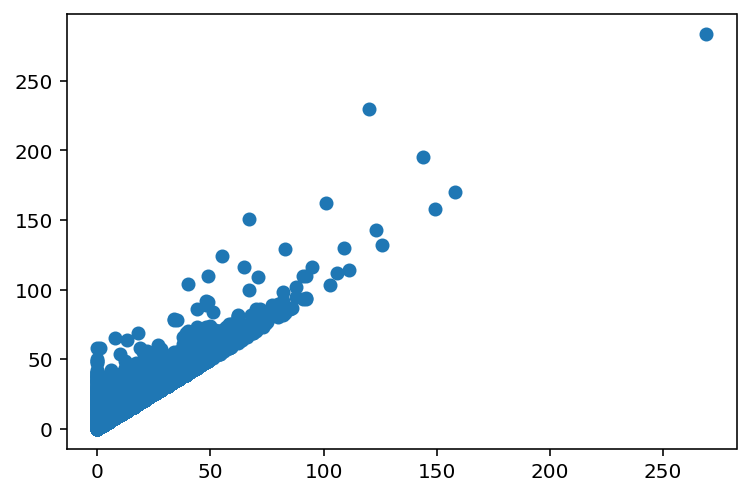

In [108]:
plt.scatter(goals_expenses.num_expenses_contributed_to, goals_expenses.num_expenses)

In [109]:
goals_expenses['log_revenue'] = np.log(goals_expenses.revenue)

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
goals_expenses[goals_expenses.user_ref == 'af31c5f7-9902-406e-a25e-0adbb92c6b81']

,user_ref,revenue,swipe_count_revenue,interest_margin_revenue,num_goals,num_expenses,num_goals_and_expenses,num_goals_contributed_to,num_expenses_contributed_to,num_goals_expenses_contributed_to,num_goals_spent_from,num_expenses_spent_from,num_goals_expenses_spent_from,log_revenue
347880,af31c5f7-9902-406e-a25e-0adbb92c6b81,23.1073,10.01,12.2853,7,15,22,5,13,18,4,14,18,3.140149


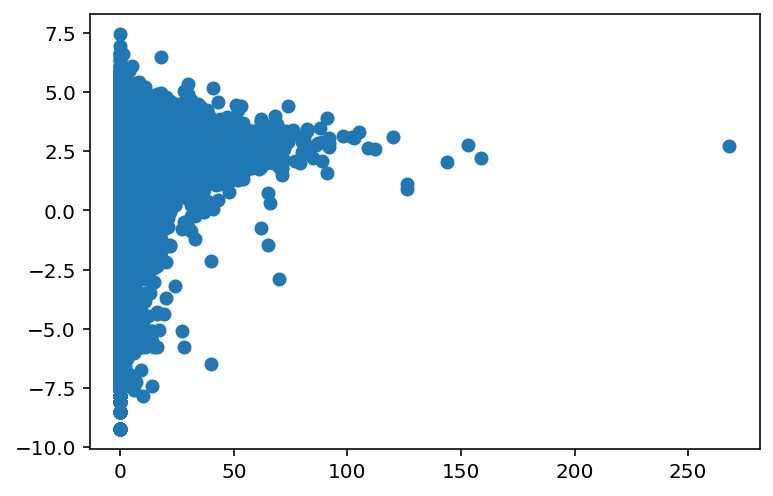

In [122]:
plt.scatter(goals_expenses.num_expenses_spent_from, goals_expenses.log_revenue)

In [126]:
mod = sm.OLS(goals_expenses.log_revenue, goals_expenses.num_goals_expenses_contributed_to)

In [127]:
res = mod.fit()

In [128]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            log_revenue   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                         nan
Time:                        17:11:46   Log-Likelihood:                             nan
No. Observations:              467528   AIC:                                        nan
Df Residuals:                  467527   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------